<a href="https://colab.research.google.com/github/JKSmirny/DeepLearningHomework_CharityFundingPredictor/blob/main/CharityPredictorGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

# New Section

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# New Section

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
charity_df = application_df.drop(['EIN'], axis=1)
charity_df = charity_df.drop(['NAME'], axis=1)
charity_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
print(charity_df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts for binning
charity_bins = charity_df['APPLICATION_TYPE'].value_counts()
charity_bins = pd.DataFrame(charity_bins)
charity_bins

,APPLICATION_TYPE
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156
T13,66


In [5]:
# Check column data types
#charity_df.dtypes

In [6]:
# Check column data types
charity_bins.dtypes

APPLICATION_TYPE    int64
dtype: object

In [37]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(charity_bins[charity_bins < 500].index)
application_types_to_replace

['T3',
 'T4',
 'T6',
 'T5',
 'T19',
 'T8',
 'T7',
 'T10',
 'T9',
 'T13',
 'T12',
 'T2',
 'T25',
 'T14',
 'T29',
 'T15',
 'T17']

In [41]:
# Replace in dataframe
for app in application_types_to_replace:
    charity_df['APPLICATION_TYPE'] = charity_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
charity_df['APPLICATION_TYPE'].value_counts()
charity_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,Other,ProductDev,Association,1,0,N,5000,1
1,Other,Independent,Other,Preservation,Co-operative,1,Jan-99,N,108590,1
2,Other,CompanySponsored,Other,ProductDev,Association,1,0,N,5000,0
3,Other,CompanySponsored,Other,Preservation,Trust,1,10000-24999,N,6692,1
4,Other,Independent,Other,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,Other,Independent,Other,ProductDev,Association,1,0,N,5000,0
34295,Other,CompanySponsored,Other,ProductDev,Association,1,0,N,5000,0
34296,Other,CompanySponsored,Other,Preservation,Association,1,0,N,5000,0
34297,Other,Independent,Other,ProductDev,Association,1,0,N,5000,1


In [42]:
# Look at CLASSIFICATION value counts for binning
charity_classes = charity_df['CLASSIFICATION'].value_counts()
charity_classes

Other    33630
C2800       95
C7100       75
C1300       58
C1280       50
         ...  
C4120        1
C2561        1
C1245        1
C8210        1
C2150        1
Name: CLASSIFICATION, Length: 61, dtype: int64

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classifications = charity_classes[charity_classes >1]
classifications = pd.DataFrame(classifications)
classifications

,CLASSIFICATION
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116
C1270,114


In [43]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classifications[classifications < 2000].index)
classifications_to_replace

['C1000',
 'C2000',
 'C1200',
 'C3000',
 'C2100',
 'C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700']

In [45]:
# Replace in dataframe
charity_classes_df = charity_df
for cls in classifications_to_replace:
    charity_classes_df['CLASSIFICATION'] = charity_classes_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
charity_classes_df['CLASSIFICATION'].value_counts()

Other    33630
C2800       95
C7100       75
C1300       58
C1280       50
         ...  
C4120        1
C2561        1
C1245        1
C8210        1
C2150        1
Name: CLASSIFICATION, Length: 61, dtype: int64

In [46]:
charity_classes_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,Other,ProductDev,Association,1,0,N,5000,1
1,Other,Independent,Other,Preservation,Co-operative,1,Jan-99,N,108590,1
2,Other,CompanySponsored,Other,ProductDev,Association,1,0,N,5000,0
3,Other,CompanySponsored,Other,Preservation,Trust,1,10000-24999,N,6692,1
4,Other,Independent,Other,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,Other,Independent,Other,ProductDev,Association,1,0,N,5000,0
34295,Other,CompanySponsored,Other,ProductDev,Association,1,0,N,5000,0
34296,Other,CompanySponsored,Other,Preservation,Association,1,0,N,5000,0
34297,Other,Independent,Other,ProductDev,Association,1,0,N,5000,1


In [47]:
# Convert categorical data to numeric with `pd.get_dummies`

classifications_df = pd.get_dummies(charity_classes_df,dtype=float)
classifications_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,5000,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
# Split our preprocessed data into our features and target arrays
y = classifications_df['IS_SUCCESSFUL'].values
y

array([1, 1, 0, ..., 0, 1, 0])

In [61]:
# Drop the column 'IS_SUCCESSUL'
X = classifications_df.drop('IS_SUCCESSFUL', axis=1).values
X

array([[1.0000000e+00, 5.0000000e+03, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0859000e+05, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 5.0000000e+03, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.6500179e+07, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [65]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [66]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [67]:
X_train.shape

(25724, 90)

In [68]:
y_train.shape

(25724,)

## Compile, Train and Evaluate the Model

In [69]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])

hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21

nn_model = tf.keras.models.Sequential()

In [70]:
# first hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# output layer 
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 7)                 637       
                                                                 
 dense_7 (Dense)             (None, 14)                112       
                                                                 
 dense_8 (Dense)             (None, 21)                315       
                                                                 
Total params: 1,064
Trainable params: 1,064
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Compile the model
nn_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [72]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


804/804 [==============================] - 2s 2ms/step - loss: 0.9630 - accuracy: 0.6214
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6182 - accuracy: 0.6868
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6061 - accuracy: 0.6932
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6022 - accuracy: 0.6967
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6005 - accuracy: 0.6971
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6000 - accuracy: 0.6969
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5998 - accuracy: 0.6979
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5992 - accuracy: 0.6978
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5989 - accuracy: 0.6978
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5990 - accuracy: 0.6977
Epoch 11/5

In [73]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


268/268 - 0s - loss: 0.6013 - accuracy: 0.6968 - 467ms/epoch - 2ms/step
Loss: 0.601347029209137, Accuracy: 0.6967930197715759


In [74]:
history = nn_model.fit(X_train_scaled, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50, verbose=1)

Epoch 1/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5954 - accuracy: 0.7024 - val_loss: 36080.4727 - val_accuracy: 0.4657
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5952 - accuracy: 0.7031 - val_loss: 18052.6133 - val_accuracy: 0.5343
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5952 - accuracy: 0.7013 - val_loss: 44481.5469 - val_accuracy: 0.5343
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5951 - accuracy: 0.7030 - val_loss: 40091.7266 - val_accuracy: 0.5343
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5949 - accuracy: 0.7027 - val_loss: 35092.3633 - val_accuracy: 0.5343
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5953 - accuracy: 0.7026 - val_loss: 22071.8262 - val_accuracy: 0.5343
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5950 - accuracy: 0.7024 - val_loss: 10305.4414 -

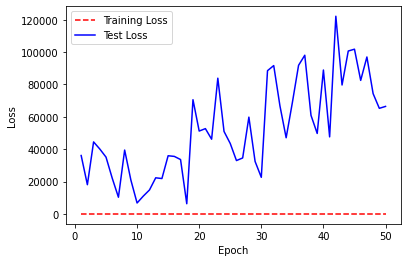

In [75]:
import matplotlib.pyplot as plt

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [78]:
# Export our model to HDF5 file
from google.colab import files

nn_model.save('/content/Model_graph.h5')
files.download('/content/Model_graph.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>